# Clusters into type I and type II superconductors
 
As shown by this distributions in the [statistics](https://github.com/fullmetalchem15t/superconductors/blob/master/Superconductor_statistics.ipynb) notebook, the data is bimodal. Superconductors can be separated into type I and II superconductors. Type I is lower in temperature and according to BCS cannot exceed 25 or 30 K. While our intuition suggests that the distribution separates into type I/II when clustered because there is clear divide by temperature, this was not the case. It was found that a significant number of the superconductors in lower temperature cluster were type II. It is not clear what factors cause the distribution to be bimodal but it may be useful to separate the data into clusters. The utility  of clustering for the prediction of critical temperature was investigated in the [linear regression](https://github.com/fullmetalchem15t/superconductors/blob/master/Superconductor_linear_reg.ipynb) and [gradient boosting](https://github.com/fullmetalchem15t/superconductors/blob/master/Superconductor_gradient_boosting.ipynb) notebooks


In [2]:
import numpy as np
import pandas as pd

#visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 20})

#machine learn algrothisms
from sklearn.preprocessing import scale 

#for statistics
from scipy import stats

#Do not display warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans #,AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN 
#from hdbscan import HDBSCAN

#import dataframes with was initialized in the Superconductor-statistics notebook
from ipynb.fs.defs.Superconductor_statistics import InitializeDataframes,ScatterAndLinePlot
prop_df,atoms_df,material=InitializeDataframes()

def TypeI_II_histagrams(label1_df,label2_df,data_string,ax):
    sns.distplot(label1_df[data_string],bins=50,ax=ax,color='blue',label='Cluster 1')
    sns.distplot(label2_df[data_string],bins=50,ax=ax,color='red', label='Cluster 2')
    
    plt.legend(fontsize=20)

## K-means clusters
 
The superconductors in the data set were separated into two clusters by K-means clustering. These clusters were labeled "Cluster 1" and "Cluser 2". These labels were originally picked because it was believed that the clusters were separated by type I/II which was not the case.
 
HDBSCAN and Affinity Propagation were also attempted to separate the data into clusters but both algorithm separated the data into thousands of clusters rather than two.

In [3]:
def KMeanTypeI_II(prop_df):
    #delete labels if already exists
    if 'label' in prop_df.columns:
        prop_df.drop('label',axis=1,inplace=True)

    #Highest critical temperature (in Kelven) for type I superconductor 
    #Based on the highest one in 1986 when type II's were discovered
    #highest_type1 = 23
    
    
    #standard scale and cluster
    ss = StandardScaler()
    prop_ss = ss.fit_transform(prop_df)
    kmeans = KMeans(n_clusters=2,random_state=1)
    cluster_labels = kmeans.fit_predict(prop_ss)
    
    #1 and 2 are used for labels because it was thought that this labels
    #correspond to type I and II. We know longer think this is the case.
    prop_df['label'] = [1 if x==1 else 2 for x in cluster_labels ]    
    
    #prop_label1 = prop_df[prop_df['label']==1]
    #prop_label2 = prop_df[prop_df['label']==2]    
    
#    print('Of the {} superconductors labeled type I by Kmean, {} were above {} K.'
#         .format(prop_label1['critical_temp'].count(),
#          prop_label1[prop_label1['critical_temp'] > highest_type1]['critical_temp'].count(),
#           highest_type1)
#         , end=' ')
#    print('That\'s {:.2f}%'.
#          format(prop_label1[prop_label1['critical_temp'] > highest_type1]['critical_temp'].count()
#          /prop_label1['critical_temp'].count() *100))
#    print('All superconductors above {} K labeled type I are changed to type II.'
#         .format(highest_type1))
#
#    # If type I superconducters are above 25 K, change to type II
#    prop_df['label']=prop_df[['critical_temp','label']].apply(lambda x:2 if x[0] > highest_type1 else x[1] ,axis=1)
#    
    return prop_df

if __name__ == '__main__':
    prop_df=KMeanTypeI_II(prop_df)#create bool label I/II database
    label1_bool = prop_df['label'] == 1 

    #remove label from dataframe. It is not used by linear model
    prop_df.drop(['label'],axis=1,inplace=True)

    #label 1
    prop_label1 = prop_df[label1_bool]
    atoms_label1 = atoms_df[label1_bool]
    material_label1 = material[label1_bool]

    #label 2
    prop_label2 = prop_df[~label1_bool]
    atoms_label2 = atoms_df[~label1_bool]
    material_label2 = material[~label1_bool]

In [4]:
print("Number of superconductors in cluster 1:{} ".format(prop_label1.shape[0]))
print("Number of superconductors in cluster 2:{} ".format(prop_label2.shape[0]))

Number of superconductors in cluster 1:8792 
Number of superconductors in cluster 2:12471 


## Cluster Histagrams
 
The following histagrams are the same distributions from the [statistics](https://github.com/fullmetalchem15t/superconductors/blob/master/Superconductor_statistics.ipynb) notebook but with the cluster separation shown by color.

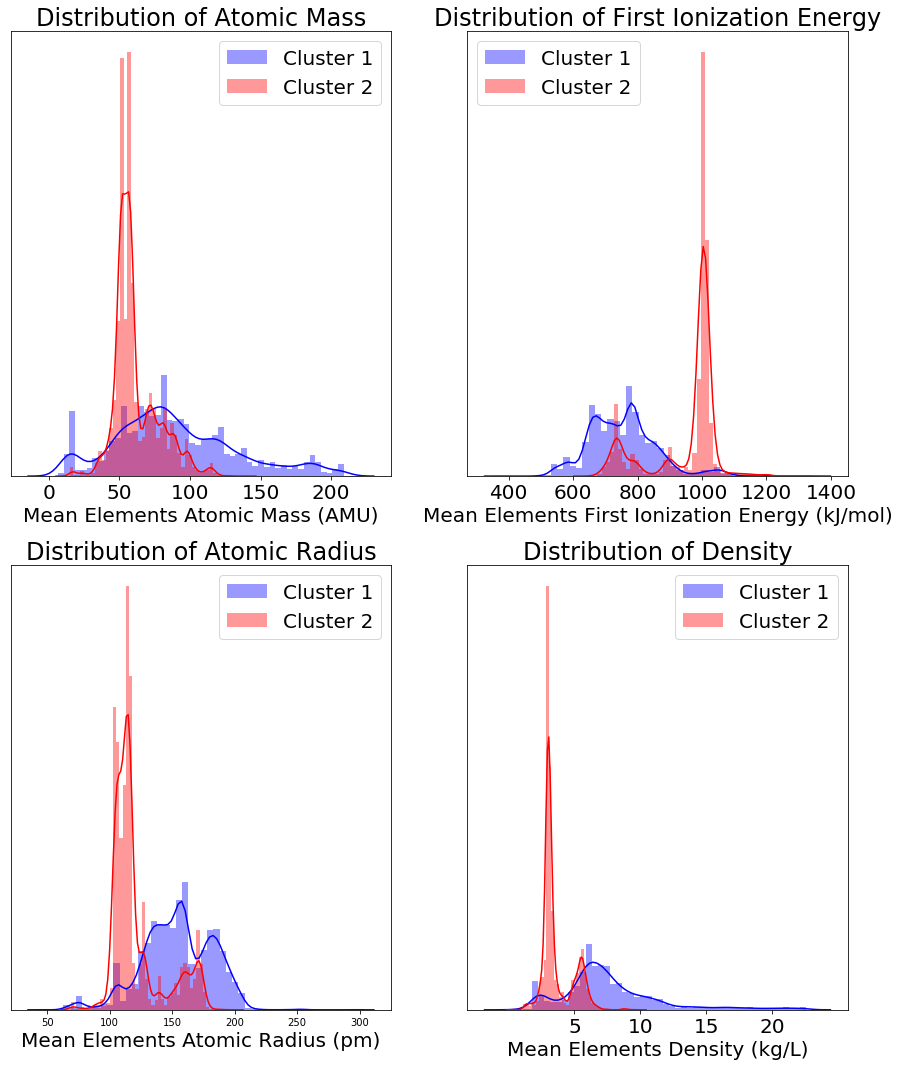

In [5]:
fig = plt.figure(figsize=(15,18)) 

#atomic mass
ax1 = fig.add_subplot(2,2,1)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_atomic_mass', ax1)
plt.yticks([])
plt.xticks(fontsize=20)
ax1.set_title('Distribution of Atomic Mass',fontsize=24)
ax1.set_xlabel('Mean Elements Atomic Mass (AMU)',fontsize=20)

#First ionization energy
ax2 = fig.add_subplot(2,2,2)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_fie', ax2)
plt.yticks([])
plt.xticks(fontsize=20)
plt.title('Distribution of First Ionization Energy',fontsize=24)
plt.xlabel('Mean Elements First Ionization Energy (kJ/mol)',fontsize=20)

#Atomic radius
ax3 = fig.add_subplot(2,2,3)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_atomic_radius', ax3)
plt.yticks([])
plt.title('Distribution of Atomic Radius',fontsize=24)
plt.xlabel('Mean Elements Atomic Radius (pm)',fontsize=20)

#Density
ax4 = fig.add_subplot(2,2,4)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_Density', ax4)
plt.yticks([])
plt.xticks([5E3,10E3,15E3,20E3],['5','10','15','20'], fontsize=20)
plt.title('Distribution of Density',fontsize=24)
plt.xlabel('Mean Elements Density (kg/L)',fontsize=20)

plt.savefig('images/Supercon_hist_typed_1.jpg',bbox_inches='tight')
plt.show()

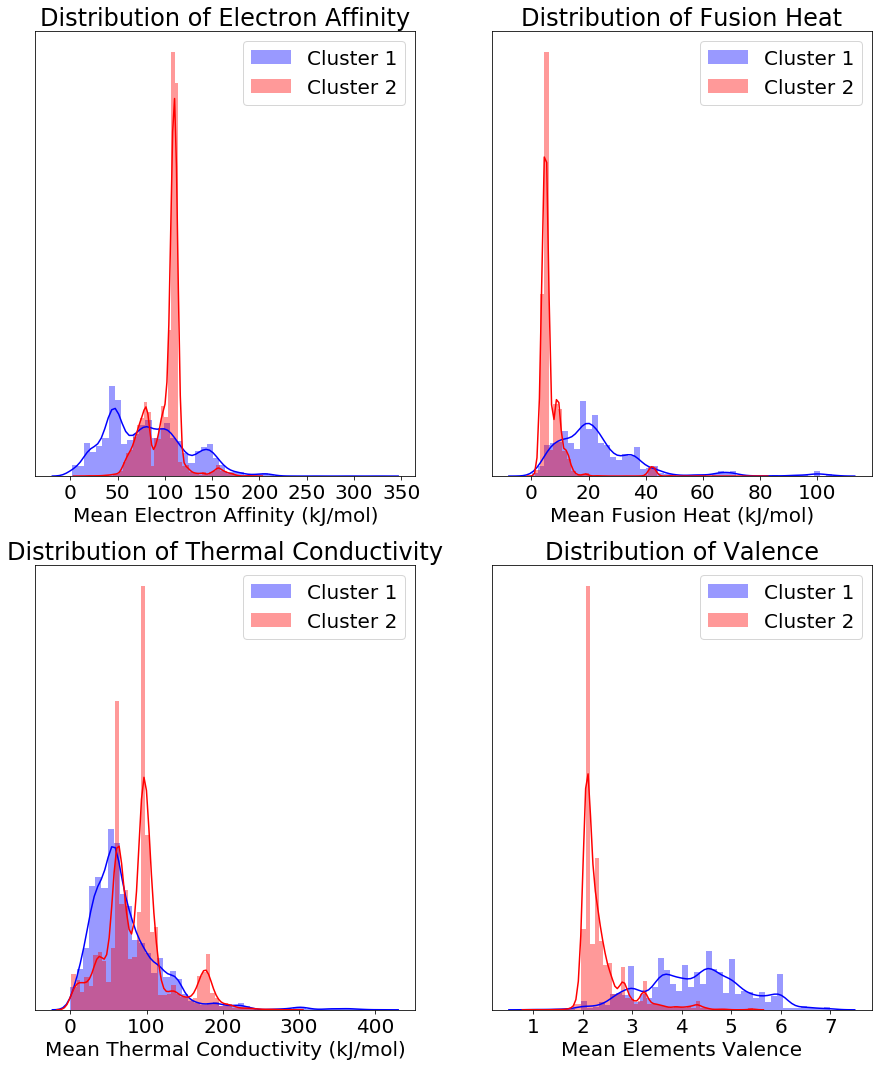

In [6]:
fig = plt.figure(figsize=(15,18)) 

#Electron Affinity
ax1 = fig.add_subplot(2,2,1)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_ElectronAffinity', ax1)
plt.yticks([])
plt.xticks(fontsize=20)
plt.title('Distribution of Electron Affinity',fontsize=24)
plt.xlabel('Mean Electron Affinity (kJ/mol)',fontsize=20)

#Electron Affinity
ax2 = fig.add_subplot(2,2,2)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_FusionHeat', ax2)
plt.yticks([])
plt.xticks(fontsize=20)
plt.title('Distribution of Fusion Heat',fontsize=24)
plt.xlabel('Mean Fusion Heat (kJ/mol)',fontsize=20)

#Thermal Conductivity
ax3 = fig.add_subplot(2,2,3)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_ThermalConductivity', ax3)
plt.yticks([])
plt.xticks(fontsize=20)
plt.title('Distribution of Thermal Conductivity',fontsize=24)
plt.xlabel('Mean Thermal Conductivity (kJ/mol)',fontsize=20)

#Valence
ax4 = fig.add_subplot(2,2,4)
TypeI_II_histagrams(prop_label1, prop_label2, 'wtd_mean_Valence', ax4)
plt.yticks([])
plt.xticks(fontsize=20)
plt.title('Distribution of Valence',fontsize=24)
plt.xlabel('Mean Elements Valence',fontsize=20)

plt.savefig('images/Supercon_hist_typed_2.jpg',bbox_inches='tight')
plt.show()

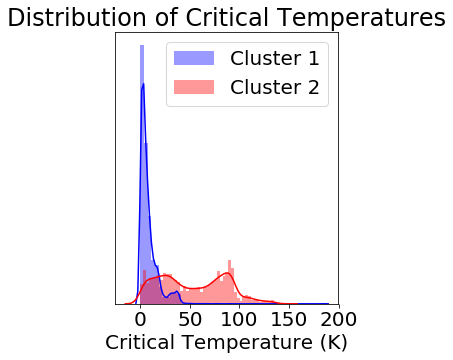

In [7]:
#visualization of critical temperature
fig = plt.figure(figsize=(4,5)) 
#ax1 = fig.add_subplot(2,2,1)
ax1 = fig.gca()
TypeI_II_histagrams(prop_label1, prop_label2, 'critical_temp', ax1)
ax1.set_title('Distribution of Critical Temperatures',fontsize=24)
ax1.set_xlabel('Critical Temperature (K)',fontsize=20)
plt.yticks([])
plt.xticks(fontsize=20)
plt.savefig('images/Supercon_hist_typed_3.jpg',bbox_inches='tight')
plt.show()